In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from statsmodels.formula.api import ols

In [3]:
data = pd.read_csv("resale-flat-prices-2017.csv")
df = pd.DataFrame(data)

In [4]:
df["remaining_lease"] = df["remaining_lease"].astype(str).str[:2]
df["remaining_lease"] = df["remaining_lease"].astype(int)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,EXECUTIVE,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66,655000.0
92266,2021-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66,650000.0
92267,2021-02,YISHUN,EXECUTIVE,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66,607000.0
92268,2021-02,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66,670000.0


In [6]:
joindf = df[(df["flat_type"]=="1 ROOM")]
joindf

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
2572,2017-03,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,57,200000.0
2573,2017-03,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,57,218000.0
6324,2017-05,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,07 TO 09,31.0,Improved,1975,56,217000.0
10018,2017-07,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,175000.0
10019,2017-07,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,56,203000.0
11821,2017-08,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,190000.0
13739,2017-09,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,01 TO 03,31.0,Improved,1975,56,190000.0
13740,2017-09,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,205000.0
17260,2017-11,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,04 TO 06,31.0,Improved,1975,56,210000.0
21757,2018-02,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,56,232000.0


In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['flat_type'] = LE.fit_transform(df['flat_type'])

In [11]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,1,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,2,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,2,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,2,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,2,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
92265,2021-02,YISHUN,5,406,YISHUN AVE 6,10 TO 12,148.0,Maisonette,1988,66,655000.0
92266,2021-02,YISHUN,5,355,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988,66,650000.0
92267,2021-02,YISHUN,5,364,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,66,607000.0
92268,2021-02,YISHUN,5,828,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,66,670000.0


In [6]:
pd.get_dummies(df['town'])

,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:

fit = ols('resale_price ~  C(town) + C(flat_model) + flat_type + remaining_lease + floor_area_sqm', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 1.032e+04
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:53:23   Log-Likelihood:            -1.1489e+06
No. Observations:               92270   AIC:                         2.298e+06
Df Residuals:                   92222   BIC:                         2.298e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -3.078e+05   3.11e+04     -9.904      0.000   -3.69e+05   -2.47e+05
C(town)[T.BEDOK]                         -1.11e+04   1322.789     -8.390      0.000   -1.37e+04   -8504.975
C(town)[T.BISHAN]                        9.928e+04   1825.507     54.385      0.000    9.57e+04    1.03e+05
C(town)[T.BUKIT BATOK]                  -8.901e+04   1499.602    -59.353      0.000   -9.19e+04   -8.61e+04
C(town)[T.BUKIT MERAH]                   1.224e+05   1501.553     81.515      0.000    1.19e+05    1.25e+05
C(town)[T.BUKIT PANJANG]                -1.324e+05   1518.581    -87.208      0.000   -1.35e+05   -1.29e+05
C(town)[T.BUKIT TIMAH]                   2.021e+05   4036.876     50.056      0.000    1.94e+05     2.1e+05
C(town)[T.CENTRAL AREA]                  1.255e+05   2954.368     42.481      0.000     1.2e+05    1.31e+05
C(town)[T.CHOA CHU KANG]                -1.832e+05   1496.480   -122.453      0.000   -1.86e+05    -1.8e+05
C(town)[T.CLEMENTI]                      4.248e+04   1662.247     25.555      0.000    3.92e+04    4.57e+04
C(town)[T.GEYLANG]                       4.218e+04   1708.787     24.683      0.000    3.88e+04    4.55e+04
C(town)[T.HOUGANG]                      -8.685e+04   1407.124    -61.725      0.000   -8.96e+04   -8.41e+04
C(town)[T.JURONG EAST]                  -6.678e+04   1704.120    -39.188      0.000   -7.01e+04   -6.34e+04
C(town)[T.JURONG WEST]                  -1.407e+05   1331.976   -105.633      0.000   -1.43e+05   -1.38e+05
C(town)[T.KALLANG/WHAMPOA]               6.161e+04   1628.524     37.830      0.000    5.84e+04    6.48e+04
C(town)[T.MARINE PARADE]                 1.648e+05   2893.818     56.942      0.000    1.59e+05     1.7e+05
C(town)[T.PASIR RIS]                    -1.113e+05   1622.533    -68.613      0.000   -1.15e+05   -1.08e+05
C(town)[T.PUNGGOL]                      -1.314e+05   1454.443    -90.323      0.000   -1.34e+05   -1.29e+05
C(town)[T.QUEENSTOWN]                    1.417e+05   1676.407     84.531      0.000    1.38e+05    1.45e+05
C(town)[T.SEMBAWANG]                    -2.011e+05   1737.709   -115.727      0.000   -2.05e+05   -1.98e+05
C(town)[T.SENGKANG]                     -1.467e+05   1377.945   -106.429      0.000   -1.49e+05   -1.44e+05
C(town)[T.SERANGOON]                    -7162.8856   1788.083     -4.006      0.000   -1.07e+04   -3658.262
C(town)[T.TAMPINES]                     -5.219e+04   1344.894    -38.803      0.000   -5.48e+04   -4.95e+04
C(town)[T.TOA PAYOH]                     5.755e+04   1579.894     36.426      0.000    5.45e+04    6.06e+04
C(town)[T.WOODLANDS]                    -1.768e+05   1336.615   -132.267      0.000   -1.79e+05   -1.74e+05
C(town)[T.YISHUN]                       -1.258e+05   1316.7

In [8]:
fit.params

Intercept                                 -307783.988716
C(town)[T.BEDOK]                           -11097.628624
C(town)[T.BISHAN]                           99280.849356
C(town)[T.BUKIT BATOK]                     -89006.593000
C(town)[T.BUKIT MERAH]                     122398.793046
C(town)[T.BUKIT PANJANG]                  -132432.395942
C(town)[T.BUKIT TIMAH]                     202068.546746
C(town)[T.CENTRAL AREA]                    125503.193081
C(town)[T.CHOA CHU KANG]                  -183248.110021
C(town)[T.CLEMENTI]                         42478.145990
C(town)[T.GEYLANG]                          42178.369581
C(town)[T.HOUGANG]                         -86854.300475
C(town)[T.JURONG EAST]                     -66780.527882
C(town)[T.JURONG WEST]                    -140701.192175
C(town)[T.KALLANG/WHAMPOA]                  61607.853297
C(town)[T.MARINE PARADE]                   164778.865337
C(town)[T.PASIR RIS]                      -111327.585987
C(town)[T.PUNGGOL]             

In [9]:
def Calculateprice(town, flatmodel, flattype, remainingl, floorarea):
    if town=="BISHAN":
        xtown = 99280.849356
    elif town == "BEDOK":
        xtown = -11097.628624
    elif town == "BUKIT BATOK":
        xtown = -89006.593000
    elif town == "BUKIT MERAH":
        xtown = 122398.793046
    elif town == "BUKIT PANJANG":
        xtown = -132432.395942
    elif town == "BUKIT TIMAH":
        xtown = 202068.546746
    elif town == "CENTRAL AREA":
        xtown = 125503.193081
    elif town == "CHOA CHU KANG":
        xtown = -183248.110021
    elif town == "CLEMENTI":
        xtown =  42478.145990
    elif town == "GEYLANG":
        xtown = 42178.369581
    elif town == "HOUGANG":
        xtown = -86854.300475
    elif town == "JURONG EAST":
        xtown = -66780.527882
    elif town == "JURONG WEST":
        xtown = -140701.192175
    elif town == "KALLANG/WHAMPOA":
        xtown = 61607.853297
    elif town =="MARINE PARADE":
        xtown = 164778.865337
    elif town == "PASIR RIS":
        xtown = -111327.585987
    elif town == "PUNGGOL":
        xtown = -131369.990688
    elif town == "QUEENSTOWN":
        xtown = 141707.753194
    elif town == "SEMBAWANG":
        xtown = -201099.714806
    elif town == "SENGKANG":
        xtown = -146652.931832
    elif town == "SERANGOON":
        xtown = -7162.885557
    elif town == "TAMPINES":
        xtown = -52185.521762
    elif town == "TOA PAYOH":
        xtown = 57549.396332
    elif town == "WOODLANDS":
        xtown = -176789.377810
    elif town == "YISHUN":
        xtown = -125828.947728
    else:
        xtown = 0
    if flatmodel=="New Generation":
        xmodel = 13609.868964
    elif flatmodel=="Adjoined flat":
        xmodel = 57992.900307
    elif flatmodel=="Apartment":
        xmodel = 18955.513638
    elif flatmodel=="DBSS":
        xmodel = 153078.137172
    elif flatmodel=="Improved":
        xmodel = -2223.630458
    elif flatmodel=="Improved-Maisonette":
        xmodel = 170588.477415
    elif flatmodel=="Model A":
        xmodel = 6.650883
    elif flatmodel=="Model A-Maisonette":
        xmodel = 117165.087397
    elif flatmodel=="Model A2":
        xmodel = -2028.514293
    elif flatmodel=="Multi Generation":
        xmodel = 113204.354194
    elif flatmodel=="Premium Apartment":
        xmodel = 8784.899432
    elif flatmodel=="Premium Apartment Loft":
        xmodel = 159835.142165
    elif flatmodel=="Premium Maisonette":
        xmodel = 64238.485880
    elif flatmodel=="Simplified":
        xmodel = 10036.341686
    elif flatmodel=="Standard":
        xmodel = 7662.284251
    elif flatmodel=="Terrace":
        xmodel = 335716.463350
    elif flatmodel=="Type S1":
        xmodel = 229031.840746
    elif flatmodel=="Type S2":
        xmodel = 274449.223234
    elif flatmodel=="Maisonette":
        xmodel = 48976.287619
    else:
        xmodel = 0
    if flattype== "1 ROOM":
        xtype = 0
    elif flattype == "2 ROOM":
        xtype = 1
    elif flattype == "3 ROOM":
        xtype = 2
    elif flattype == "4 ROOM":
        xtype = 3
    elif flattype == "5 ROOM":
        xtype = 4
    elif flattype == "EXECUTIVE":
        xtype = 5
    else:
        xtype =6
    res = -307783.988716 + xtown + xmodel + (xtype*24787.173062) + (remainingl*5359.995190) + (floorarea*3428.700582)
    res = round(res, 2)
    return res

In [12]:
print(Calculateprice("BUKIT MERAH", "Improved", "1 ROOM", 56, 30))

215411.92


<AxesSubplot:xlabel='resale_price', ylabel='flat_model'>

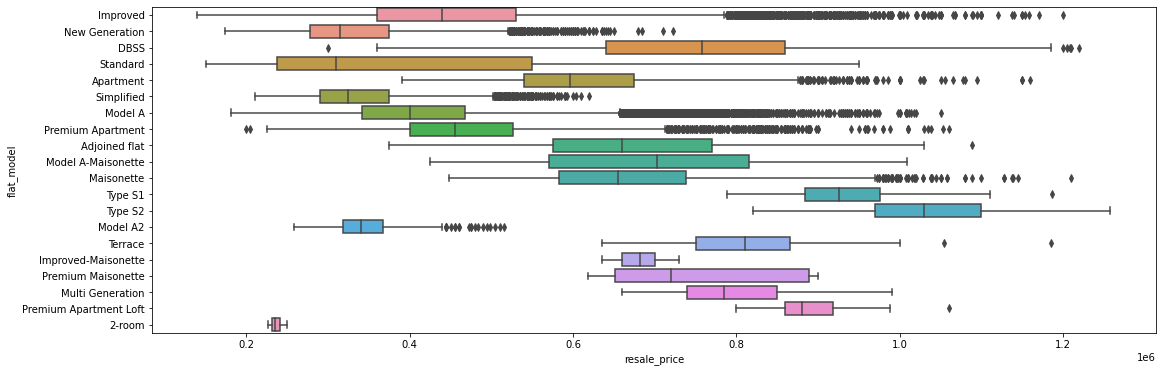

In [33]:

f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x="resale_price", y="flat_model",data = jointDF2, orient = "h")

In [68]:
index_sort = jointDF2.groupby("flat_model").mean()
index_sort = pd.DataFrame(index_sort)
index_sort.sort_values(by=['resale_price'])

,resale_price
flat_model,
2-room,2.367500e+05
New Generation,3.316355e+05
Simplified,3.419463e+05
Model A2,3.458456e+05
Standard,3.958953e+05
Model A,4.269078e+05
Improved,4.561034e+05
Premium Apartment,4.720124e+05
Apartment,6.148849e+05


In [69]:
jointDF = pd.concat([df['resale_price'], df['town'].reindex(index=df['resale_price'].index)], sort = True, axis = 1)

<AxesSubplot:xlabel='resale_price', ylabel='town'>

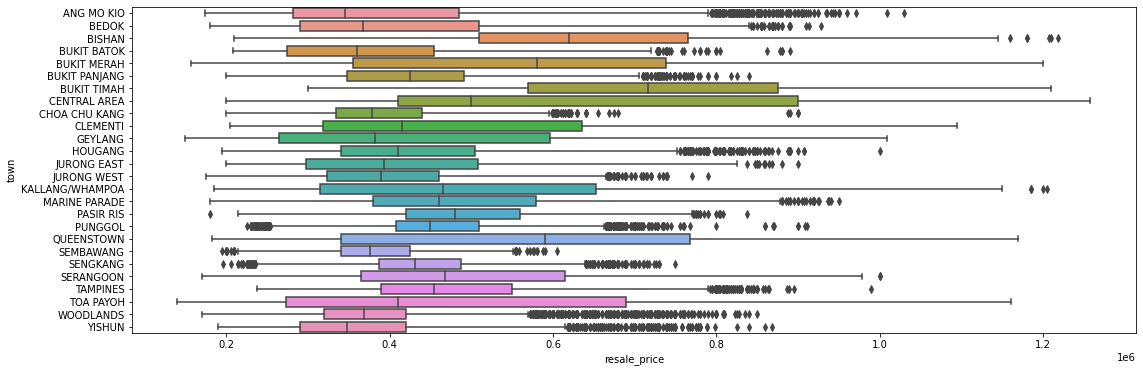

In [71]:
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x="resale_price", y="town",data = jointDF, orient = "h")